# 计算cpk并绘图

## 正态分布
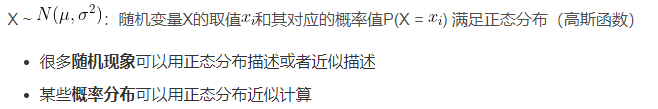

1.概率密度函数：
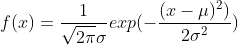

2.正态分布函数曲线的性质：
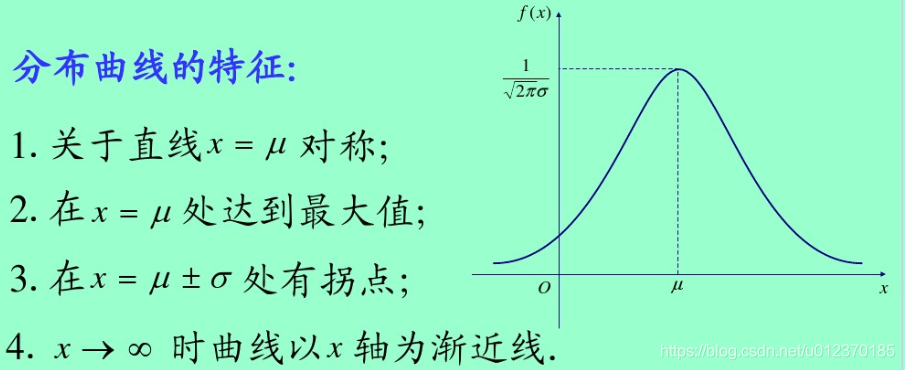
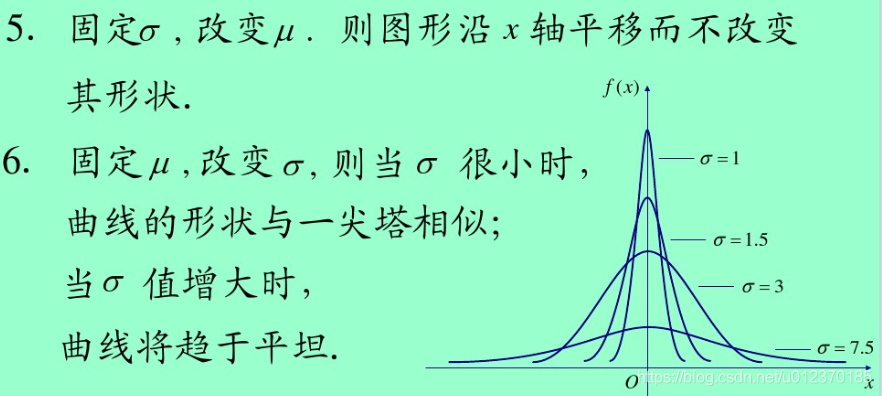


3.正态分布的概率分布函数
概率分布函数是正态分布曲线的定积分，公式为：
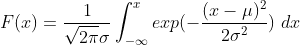


正态分布曲线与x轴围成的面积是1(积分区间是负无穷到正无穷)
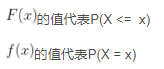



## 正态分布


![image.png](https://img-blog.csdnimg.cn/20190516155417303.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTIzNzAxODU=,size_16,color_FFFFFF,t_70)

In [ ]:
## 导入使用到的modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

title = None
legendlist = []

## 定义计算cpk和绘图的函数

In [2]:
def cpk_calc(df_data: pd.DataFrame, usl, lsl,serialTitle):
    """
    :param df_data: 数据dataframe
    :param usl: 数据指标上限
    :param lsl: 数据指标下限
    :return:
    """
    global title
    sigma = 3
    # 若下限为0, 则使用上限反转负值替代
    if int(lsl) == 0:
        lsl = 0 - usl
 
    # 数据平均值
    #print(type(df_data.mean()))
    #print(df_data.mean())


    u = df_data.mean()[serialTitle]

    print('mean',u)

    # 数据标准差
    stdev = np.std(df_data[serialTitle].values, ddof=1)
    print('stdev',stdev)

    # 生成横轴数据平均分布
    x1 = np.linspace(u - sigma * stdev, u + sigma * stdev, 1000)
    #print(type(x1))

    # 计算正态分布曲线
    y1 = np.exp(-(x1 - u) ** 2 / (2 * stdev ** 2)) / (math.sqrt(2 * math.pi) * stdev)
    #print(type(y1))
    
    # cp = 公差/6倍标准偏差
    cp = (usl - lsl)/(6*sigma) 

    cpu = (usl - u) / (sigma * stdev)
    cpl = (u - lsl) / (sigma * stdev)
    # 得出cpk
    cpk = min(cpu, cpl)
    
    sigma_Level = sigma * cpk
    
       
    
    print(cpu,cpl,cpk)
    # 使用matplotlib画图
    plt.xlim(x1[0] - 0.000005, x1[-1] + 0.000005)
    plt.plot(x1, y1)


    #plt.hist(df_data.values, 15, density=True)
    if title is None:
        title = "{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev)
    else:
        title = title + ("{0} :CPK={1},mean = {2},stdev = {3}\n".format(serialTitle,cpk,u,stdev))
    plt.title(title)
    legendlist.append(serialTitle)
    print(serialTitle)
    
    plt.legend(legendlist)


## 导入待处理的数据

In [3]:
xlsx_file = "cpkdata.xlsx"
"""
# read_excel方法读取文件
xlsx_feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5, 6, 7]) 
#usecols属性读取excel文件中的指定列，列号从0起始；skiprows属性跳过excel文件中指定行，行号从0起始

"""
# read_excel方法返回类型为DataFrame，不需要再次转换
feature = pd.read_excel(xlsx_file, usecols=[1, 2, 3, 4, 5,6])

print(feature)

     DCV(1V)
0   1.000003
1   0.999996
2   1.000002
3   0.999999
4   1.000001
5   1.000001
6   1.000001
7   1.000002
8   1.000002
9   1.000003
10  1.000000
11  1.000002
12  1.000004
13  1.000002


In [4]:
print(feature.index)

RangeIndex(start=0, stop=14, step=1)


In [5]:
print(feature.columns)
print(feature.values)

Index(['DCV(1V)'], dtype='object')
[[1.000003]
 [0.999996]
 [1.000002]
 [0.999999]
 [1.000001]
 [1.000001]
 [1.000001]
 [1.000002]
 [1.000002]
 [1.000003]
 [1.      ]
 [1.000002]
 [1.000004]
 [1.000002]]


In [6]:
# print(feature['18C'].values)

In [7]:
s = feature.mean()
print(s)


DCV(1V)    1.000001
dtype: float64


In [8]:

print(s.index)

Index(['DCV(1V)'], dtype='object')


In [9]:
print(s.values)

[1.00000129]


## 处理数据并 生成cpk曲线

mean 1.0000012857142857
stdev 1.9778998741306336e-06
-7.463423682351341 -7.030063597573272 -7.463423682351341
DCV(1V)


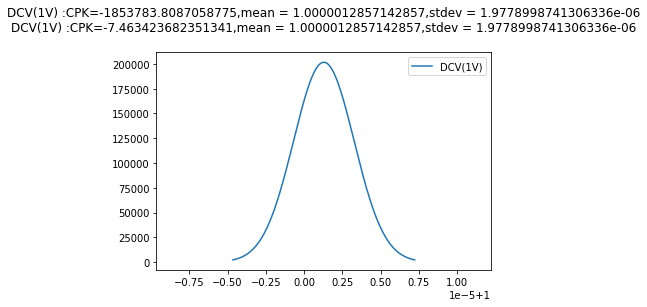

In [11]:
usl = 0.999957



lsl = 1.000043


for i in range(len(s.values)):
    cpk_calc(feature,usl,lsl,s.index[i])
    
# cpk_calc(feature,usl,lsl,'18C')
# cpk_calc(feature,usl,lsl,'28C')
# cpk_calc(feature,usl,lsl,'after temp. cycle')
# cpk_calc(feature,usl,lsl,'storage 60C')
# cpk_calc(feature,usl,lsl,'storage -40C')

plt.show()
